In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# inbuild packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML packages
from sklearn.ensemble import IsolationForest
import logging
from pathlib import Path
import joblib
# from ucimlrepo import fetch_ucirepo


In [4]:
import sys
sys.path.append("../src")
sys.path.append("../logs")
sys.path.append("../config")

In [24]:
import config
import utils.load_data as load_data
import data_processing.features as features
import models.prediction as prediction

In [25]:
model_path = config.model_path
data_file_path = config.data_file_path

In [26]:
data = load_data.load_data_as_pandas_df(data_file_path)

In [27]:
features_data = features.features_selection(data)

In [28]:
features_data.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166.0,113.0
1,2.0,9.4,103.0,92.0
2,2.2,9.0,131.0,114.0
3,2.2,9.2,172.0,122.0
4,1.6,6.5,131.0,116.0


### Prediction Pipeline

In [29]:
def prediction_pipeline(data_file_path, model_path):
    # fetch data
    data = load_data.load_data_as_pandas_df(data_file_path)
    features_data = features.features_selection(data)

    data = data.loc[features_data.index].copy()
    
    # load model
    model = prediction.load_model(model_path)
    
    # make prediction
    data['anomaly_score'] = model.decision_function(features_data)
    data['anomaly'] = model.predict(features_data)
    
    return data

In [32]:
data = prediction_pipeline(data_file_path, model_path)
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,anomaly_score,anomaly
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,0.288367,1
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,0.299662,1
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,0.301895,1
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,0.303594,1
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,0.308148,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568,0.229910,1
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119,0.256118,1
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406,0.258837,1
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139,0.281671,1


### Post processing

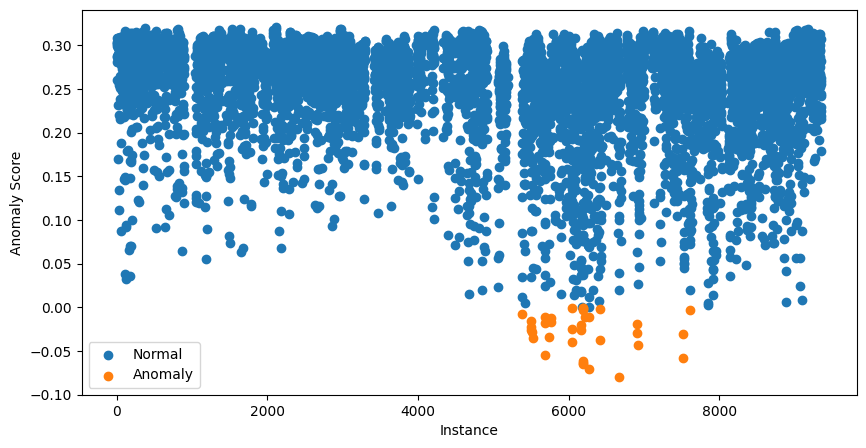

In [33]:
# Visualization of the results
plt.figure(figsize=(10, 5))

# Plot normal instances
normal = data[data['anomaly'] == 1]
plt.scatter(normal.index, normal['anomaly_score'], label='Normal')

# Plot anomalies
anomalies = data[data['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['anomaly_score'], label='Anomaly')
plt.xlabel("Instance")
plt.ylabel("Anomaly Score")
plt.legend()
plt.show()

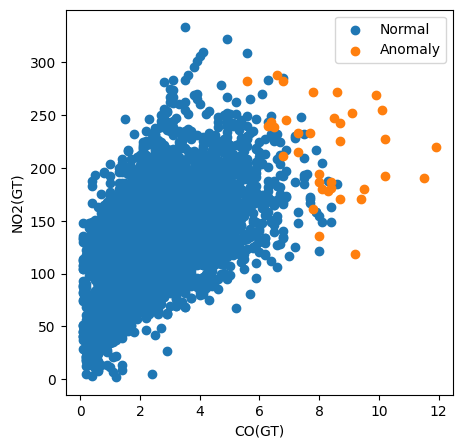

In [14]:
# Visualization of the results
plt.figure(figsize=(5, 5))

# Plot non-anomalies then anomalies
plt.scatter(normal['CO(GT)'], normal['NO2(GT)'], label='Normal')
plt.scatter(anomalies['CO(GT)'], anomalies['NO2(GT)'], label='Anomaly')
plt.xlabel("CO(GT)")
plt.ylabel("NO2(GT)")
plt.legend()
plt.show()